In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding
from tensorflow.keras.layers import LSTM
from tensorflow.keras.datasets import imdb

%matplotlib inline


In [12]:
import matplotlib

matplotlib.rc('figure', figsize=(15,10))

In [13]:
df=pd.read_excel('traffic-counts-to-august-2019 (Autosaved).xlsx')

In [14]:
df.head()

,Area,Road_Name,Carriageway_Start_Name,Carriageway_End_Name,Description,Direction,Count_Start_Date,5_Day_ADT,7_Day_ADT,Saturday_Volume,...,MCV,HCV-I,HCV-II,HCV Total,AM-Non-Peak-Hours,AM-Non-Peak-Hour-Volume,Mid-Day-Non-Peak-Hour-Time,Mid-Day-Non-Peak-Volume,PM-Non-Peak-Hours,PM-Non-Peak-Hour-Volume
0,North,Access Road #2,NaN,NaN,At Bridge 1020m,Both,2012-05-25,1731.2,1603.428571,1352.0,...,0.038876,0.011031,0.002046,0.051953,0900,117.0,1238.0,157,1625.0,188.0
1,South,Kirkbride Road,Westney Rd,End 750 Massey Rd Moble S,!Kirkbride Rd ((Approx 80m east Westney Rd - o...,Both,2012-07-15,17334.4,15659.857143,12921.0,...,0.043076,0.008812,0.003941,0.055830,0901,86.0,1236.0,105,1619.0,187.0
2,North,COATESVILLE RIVERHEAD HIGHWAY,RIVERHEAD ROAD,STATE HIGHWAY 16,Coatsville-Riverhead Highway 80kph,Both,2012-07-16,5307.6,5230.857143,5999.0,...,0.026518,0.012290,0.003468,0.042277,0902,105.0,1235.0,152,1622.0,160.0
3,North,COATESVILLE RIVERHEAD HIGHWAY,STATE HIGHWAY 17,WIDTH CHANGE,C-R H'way 50m S SH17 80kph,Both,2012-07-16,6120.0,5820.571429,5962.0,...,0.029010,0.012615,0.003264,0.044890,0903,92.0,1237.0,128,1630.0,148.0
4,South,Bader Drive,NaN,NaN,!Bader Dr (Approx 150 east Bader Dr off-ramp o...,Both,2012-07-16,17062.6,16457.714286,18328.0,...,0.017369,0.004245,0.000859,0.022473,0904,113.0,1232.0,113,1616.0,181.0


In [15]:
df['AM_Peak_Hour']

0        700.0
1        745.0
2        745.0
3        730.0
4        815.0
5        815.0
6        815.0
7        800.0
8        800.0
9        745.0
10       715.0
11       800.0
12       745.0
13       745.0
14       800.0
15       745.0
16       815.0
17       730.0
18       745.0
19       815.0
20       815.0
21       730.0
22       815.0
23       800.0
24       645.0
25       800.0
26       745.0
27       830.0
28       800.0
29       800.0
         ...  
12401    745.0
12402    800.0
12403    745.0
12404    800.0
12405    800.0
12406    800.0
12407    745.0
12408    800.0
12409    800.0
12410    900.0
12411    745.0
12412    845.0
12413    800.0
12414    815.0
12415    815.0
12416    900.0
12417    745.0
12418    730.0
12419    745.0
12420    800.0
12421    730.0
12422    700.0
12423    745.0
12424    715.0
12425    800.0
12426    700.0
12427    745.0
12428    645.0
12429    830.0
12430    715.0
Name: AM_Peak_Hour, Length: 12431, dtype: float64

In [16]:
df.dtypes

Area                                  object
Road_Name                             object
Carriageway_Start_Name                object
Carriageway_End_Name                  object
Description                           object
Direction                             object
Count_Start_Date              datetime64[ns]
5_Day_ADT                            float64
7_Day_ADT                            float64
Saturday_Volume                      float64
Sunday_Volume                        float64
AM_Peak_Volume                       float64
AM_Peak_Hour                         float64
Mid_Peak_Volume                      float64
Mid_Peak_Hour                        float64
PM_Peak_Volume                       float64
PM_Peak_Hour                         float64
Car                                  float64
LCV                                  float64
MCV                                  float64
HCV-I                                float64
HCV-II                               float64
HCV Total 

In [17]:
df["Count_Start_Date"].fillna(0, inplace = True) 

In [18]:
df["Count_Start_Date"]= df["Count_Start_Date"].astype(str) 

In [19]:
df["Count_Start_Date"]= df["Count_Start_Date"].astype(str) 

In [20]:
df.dtypes

Area                           object
Road_Name                      object
Carriageway_Start_Name         object
Carriageway_End_Name           object
Description                    object
Direction                      object
Count_Start_Date               object
5_Day_ADT                     float64
7_Day_ADT                     float64
Saturday_Volume               float64
Sunday_Volume                 float64
AM_Peak_Volume                float64
AM_Peak_Hour                  float64
Mid_Peak_Volume               float64
Mid_Peak_Hour                 float64
PM_Peak_Volume                float64
PM_Peak_Hour                  float64
Car                           float64
LCV                           float64
MCV                           float64
HCV-I                         float64
HCV-II                        float64
HCV Total                     float64
AM-Non-Peak-Hours              object
AM-Non-Peak-Hour-Volume       float64
Mid-Day-Non-Peak-Hour-Time    float64
Mid-Day-Non-

In [21]:
df["Count_Start_Date"]= df["Count_Start_Date"].astype(str) 

In [22]:
df["AM_Peak_Hour"].fillna(0, inplace = True) 

In [23]:
df["AM_Peak_Hour"]= df["AM_Peak_Hour"].astype(int) 

In [24]:
df.dtypes
df['5_Day_ADT']
df['7_Day_ADT']
df['Saturday_Volume']
df['Sunday_Volume']

0         1216.0
1        10026.0
2         4079.0
3         4182.0
4        11563.0
5        16768.0
6         7526.0
7         6885.0
8         8212.0
9         4727.0
10       13173.0
11       14265.0
12       14611.0
13       10754.0
14        8686.0
15        3039.0
16        1639.0
17         373.0
18         427.0
19         197.0
20         288.0
21         193.0
22         270.0
23        1449.0
24         396.0
25         711.0
26        3137.0
27         195.0
28         716.0
29         705.0
          ...   
12401     7710.0
12402     7301.0
12403     7592.0
12404     9184.0
12405    14626.0
12406    11770.0
12407     8222.0
12408     8658.0
12409    13622.0
12410      849.0
12411      563.0
12412      666.0
12413      646.0
12414    15167.0
12415    14057.0
12416     4269.0
12417     2924.0
12418     2986.0
12419     2663.0
12420     2523.0
12421      186.0
12422     2142.0
12423      136.0
12424      959.0
12425     1732.0
12426      642.0
12427     1238.0
12428     6677

In [25]:
df["Mid_Peak_Hour"].fillna(0, inplace = True) 

In [26]:
df["Mid_Peak_Hour"]= df["Mid_Peak_Hour"].astype(int) 

In [27]:
df["PM_Peak_Hour"].fillna(0, inplace = True) 

In [28]:
df["PM_Peak_Hour"]= df["PM_Peak_Hour"].astype(int) 

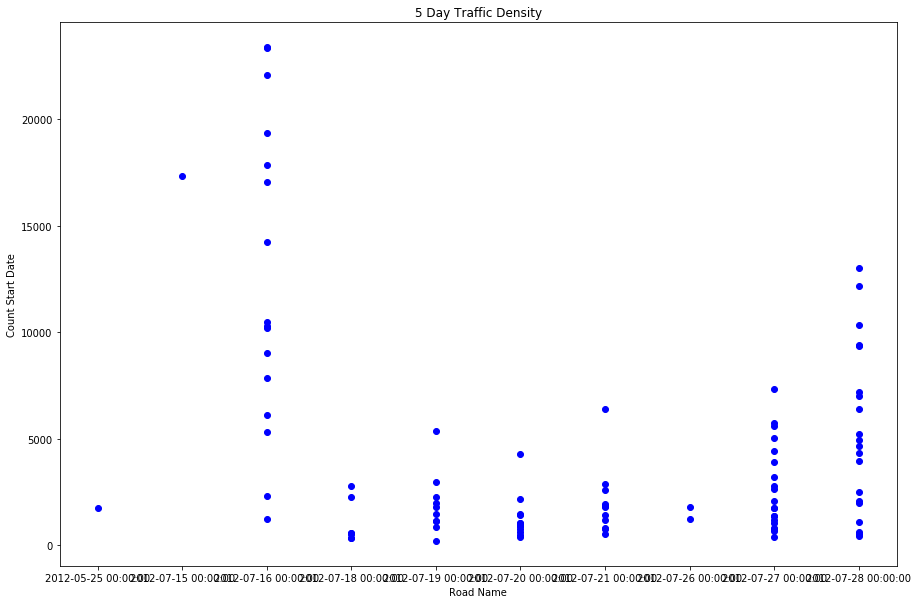

In [29]:
X=df['Count_Start_Date'][:100]
Y=df['5_Day_ADT'][:100]
plt.plot(X, Y,'bo')
plt.xlabel('Road Name')
plt.ylabel('Count Start Date')
plt.title('5 Day Traffic Density')
plt.show()

In [30]:
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding
from tensorflow.keras.layers import LSTM

# Random Forest Forecasting

In [31]:
training_data=df[0:10]
test_data=df[10:20]
val_data=df[20:30]
clean_train=training_data[['AM_Peak_Hour','Saturday_Volume','Sunday_Volume','5_Day_ADT','7_Day_ADT']]
clean_test=test_data[['AM_Peak_Hour','Saturday_Volume','Sunday_Volume','5_Day_ADT','7_Day_ADT']]
clean_val=val_data[['AM_Peak_Hour','Saturday_Volume','Sunday_Volume','5_Day_ADT','7_Day_ADT']]


In [32]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error

In [33]:
X_train,y_train = clean_train.drop(["Saturday_Volume"],axis=1),clean_train.Saturday_Volume
X_test,y_test = clean_test.drop(["Saturday_Volume"],axis=1),clean_test.Saturday_Volume
X_val,y_val = clean_val.drop(["Saturday_Volume"],axis=1),clean_val.Saturday_Volume


In [34]:
scaler = StandardScaler()
rfr  = RandomForestRegressor(random_state=98,verbose=20,n_jobs=5, max_features = "auto")

In [35]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)
X_val_scaled=scaler.fit_transform(X_val)


In [36]:
rfr.fit(X_train_scaled,y_train)

building tree 1 of 10building tree 2 of 10building tree 3 of 10
building tree 4 of 10
building tree 5 of 10


building tree 6 of 10
building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10


[Parallel(n_jobs=5)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done   2 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=5)]: Done   3 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=5)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=5)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=5)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=5)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=5)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=5)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=5)]: Done  10 out of  10 | elapsed:    0.0s finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=5,
           oob_score=False, random_state=98, verbose=20, warm_start=False)

In [37]:
rfr.score(X_test,y_test)

[Parallel(n_jobs=5)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done   2 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=5)]: Done   3 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=5)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=5)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=5)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=5)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=5)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=5)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=5)]: Done  10 out of  10 | elapsed:    0.0s finished


-1.7310933144318217

In [38]:
test_data["RF_PREDICTED"] = rfr.predict(X_test_scaled)


[Parallel(n_jobs=5)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done   2 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=5)]: Done   3 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=5)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=5)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=5)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=5)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=5)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=5)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=5)]: Done  10 out of  10 | elapsed:    0.0s finished
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

In [39]:
test_data


,Area,Road_Name,Carriageway_Start_Name,Carriageway_End_Name,Description,Direction,Count_Start_Date,5_Day_ADT,7_Day_ADT,Saturday_Volume,...,HCV-I,HCV-II,HCV Total,AM-Non-Peak-Hours,AM-Non-Peak-Hour-Volume,Mid-Day-Non-Peak-Hour-Time,Mid-Day-Non-Peak-Volume,PM-Non-Peak-Hours,PM-Non-Peak-Hour-Volume,RF_PREDICTED
10,South,Massey Road,Buckland Road,Walter Street,!Massey Rd (Approx 40m west Walter St outside ...,Both,2012-07-16 00:00:00,19361.0,18349.857143,18471.0,...,0.012285,0.006501,0.043636,0910,141.0,1235.0,160,1620.0,122.0,16607.4
11,South,Massey Road,Imrie Avenue,Friesian Drive,!Massey Rd (Approx 15m east Tussock Ave outsid...,Both,2012-07-16 00:00:00,23384.6,21713.142857,20804.0,...,0.008599,0.003744,0.043515,0911,125.0,1241.0,149,1621.0,112.0,17148.1
12,South,Massey Road,Tennessee Avenue,Viola Avenue,!Massey Rd (Approx 120m east of Viola Ave outs...,Both,2012-07-16 00:00:00,22058.0,20923.857143,21566.0,...,0.005605,0.002403,0.038842,0912,105.0,1240.0,154,1619.0,153.0,16607.4
13,South,Massey Road,Plumley Crescent East,Thomas Road,!Massey Rd (Approx 100m east Thomas Rd outside...,Both,2012-07-16 00:00:00,17831.4,16429.142857,15093.0,...,0.008165,0.006069,0.047181,0913,91.0,1231.0,104,1618.0,156.0,14444.6
14,South,Mckenzie Road,Walmsley Rd-Miller Rd,Coronation Rd,!McKenzie Rd (Approx 170m north Walmsley Rd ou...,Both,2012-07-16 00:00:00,14234.6,13256.285714,12935.0,...,0.015066,0.009052,0.053506,0914,146.0,1244.0,102,1620.0,173.0,12784.9
15,South,Mckenzie Road,Kirkbride Rd Cemetery,Valiant St,!McKenzie Rd (Approx 380m south Valliant St-Si...,Both,2012-07-16 00:00:00,7860.0,6702.714286,4580.0,...,0.018841,0.014323,0.157292,0915,158.0,1243.0,170,1721.0,138.0,8323.5
16,South,Pavilion Drive,Montgomerie Rd,Penihana Pl,!Pavilion Dr (Approx 50m north Penihana Pl out...,Both,2012-07-16 00:00:00,2313.4,2018.571429,924.0,...,0.042109,0.032838,0.290800,0916,148.0,1238.0,124,1721.0,133.0,6759.8
17,South,Pavilion Drive,Sharp Curve Second PW16 Signs,Montgomeric-Rennie Drive Rab Start,!Pavilion Dr (Approx 210m sth Montgomerie Rd [...,Both,2012-07-16 00:00:00,1251.4,991.142857,308.0,...,0.028683,0.019746,0.226002,0917,137.0,1237.0,169,1730.0,165.0,5519.5
18,Central,Edmonton Ave,Gambia Pl,State Ave,Edmonton Ave-Gambia twd State [50] os# 53,Both,2012-07-18 00:00:00,567.8,546.714286,561.0,...,0.000784,0.000000,0.022211,0918,96.0,1245.0,179,1701.0,122.0,5526.9
19,Central,Houpara Street,Oranga Ave,Rangipawa Rd,Houpara St-Oranga twd Rangipawa [50] os# 14a,Both,2012-07-18 00:00:00,353.6,314.857143,239.0,...,0.002722,0.000000,0.014519,0919,126.0,1234.0,101,1727.0,107.0,6759.8


# ARIMA

# LSTM 

In [40]:
X_t_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))

X_val_resaped = X_val_scaled.reshape((X_val_scaled.shape[0], 1, X_val_scaled.shape[1]))


In [41]:
model = Sequential()
model.add(Embedding(20000, 128))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [42]:

model.add(Flatten())

NameError: name 'Flatten' is not defined

In [ ]:
model.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
model.fit(X_t_reshaped, X_t_reshaped,
          batch_size=32,
          epochs=15,
          verbose=2,
          validation_data=(X_val_resaped, y_val))

# Visualisation

In [ ]:
x=test_data['Road_Name']
y1=test_data['Saturday_Volume']
y2=test_data['RF_PREDICTED']


In [ ]:
y2

In [ ]:
X=df['Road_Name'][:100]
Y=df['7_Day_ADT'][:100]
plt.plot(X, Y, 'bo')
plt.xlabel('Road Name')
plt.ylabel('7 Day Average Traffic Density')
plt.title('Weekly Traffic Density')
plt.show()

In [ ]:
X=df['Road_Name'][:100]
Y=df['Saturday_Volume'][:100]
plt.plot(X, Y, 'bo')
plt.xlabel('Road Name')
plt.ylabel('Saturday Volume')
plt.title('Saturday Traffic Volume')
plt.show()

In [ ]:
X=df['Road_Name'][:100]
Y=df['Sunday_Volume'][:100]
plt.plot(X, Y, 'bo')
plt.xlabel('Road Name')
plt.ylabel('Sunday Volume')
plt.title('Sunday Traffic Volume')
plt.show()

In [ ]:
X=df['AM_Peak_Hour'][:100]
Y=df['AM_Peak_Volume'][:100]
plt.plot(X, Y, 'bo')
plt.xlabel('AM Peak Hour')
plt.ylabel('AM Peak Volume')
plt.title('Morning Traffic')
plt.show()

In [ ]:
X=df['Mid_Peak_Hour'][:100]
Y=df['Mid_Peak_Volume'][:100]
plt.plot(X, Y, color='g')
plt.xlabel('Mid-Day Peak Hour')
plt.ylabel('Mid-Day Peak Volume')
plt.title('Mid-Day Traffic')
plt.show()

In [ ]:
X=df['PM_Peak_Hour'][:100]
Y=df['PM_Peak_Volume'][:100]
plt.plot(X, Y, color='g')
plt.xlabel('PM Peak Hour')
plt.ylabel('PM Peak Volume')
plt.title('Evening Traffic')
plt.show()